# Ex2: Ziegler & Nichols - Frequency response

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import control as ct

## System

In [2]:
# Definition
num1 = [1]
den1 = [1, 6, 5, 0]

G = ct.tf(num1, den1)
print(G)


        1
-----------------
s^3 + 6 s^2 + 5 s



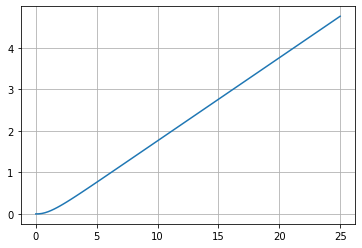

In [3]:
# Response
t1, c1 = ct.step_response(G)
plt.plot(t1, c1)
plt.grid()

## Controller

In [4]:
tsim = 20
dt = 0.1
t = np.arange(0, tsim, dt)

Kcr,_, Wcr, _ = ct.margin(G)
Pcr = 2*np.pi/Wcr

print('Critical gain: {a:1.4f}, Critical frequency: {b:1.4f}'.format(a=Kcr, b=Pcr))

Critical gain: 30.0000, Critical frequency: 2.8099


### P controller

Kp: 15.0000


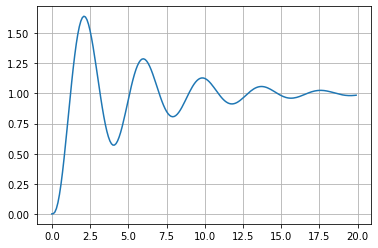

In [5]:
Kp = 0.5*Kcr
print('Kp: {a:1.4f}'.format(a=Kp))

Gc1 = Kp


t2, c2 = ct.step_response(ct.feedback(Gc1*G), T=t)
plt.plot(t2, c2)
plt.grid()

### PI controller

Kp: 13.5000, Ti: 2.3416


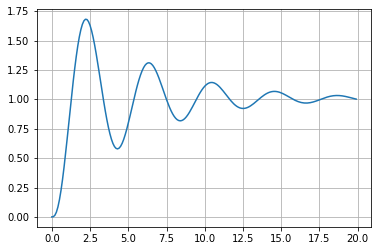

In [6]:
Kp = 0.45*Kcr
Ti = Pcr/1.2
print('Kp: {a:1.4f}, Ti: {b:1.4f}'.format(a=Kp, b=Ti))

Gc2 = ct.tf([Kp*Ti, Ti],[Ti, 0])


t3, c3 = ct.step_response(ct.feedback(Gc2*G), T=t)
plt.plot(t3, c3)
plt.grid()

### PID controller

Kp: 18.0000, Ti: 1.4050, Td: 0.3512


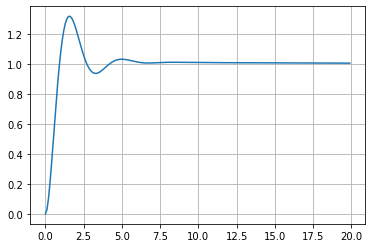

In [7]:
Kp = 0.6*Kcr
Ti = 0.5*Pcr
Td = 0.125*Pcr
print('Kp: {a:1.4f}, Ti: {b:1.4f}, Td: {c:1.4f}'.format(a=Kp, b=Ti, c=Td))

Gc3 = ct.tf([Kp*Ti*Td, Kp*Ti, Ti],[Ti, 0])


t4, c4 = ct.step_response(ct.feedback(Gc3*G), T=t)
plt.plot(t4, c4)
plt.grid()